#Anomaly Detection & Time Series

---
**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

---

Answer: **Anomaly Detection**

Anomaly Detection is the process of identifying data points, events, or observations that deviate significantly from the expected behavior of a dataset. These unusual patterns, often called outliers or anomalies, can indicate critical insights such as fraud, system failures, or rare events. Anomaly detection is widely used in domains like finance, cybersecurity, healthcare, and industrial monitoring.

**Types of Anomalies:**

**1. Point Anomalies:**
A point anomaly occurs when a single data point is significantly different from the rest of the data. These anomalies are independent and can be detected by comparing the point to a statistical threshold or a model of normal behavior.
*Example:* In credit card transactions, a purchase of ₹5,00,000 by a customer who usually spends less than ₹5,000 would be considered a point anomaly.

**2. Contextual (Conditional) Anomalies:**
Contextual anomalies are data points that are anomalous in a specific context but may appear normal otherwise. These anomalies require understanding the surrounding conditions or features (context) to identify them.
*Example:* A temperature reading of 35°C in winter is unusual (contextual anomaly), but the same temperature in summer would be normal. Similarly, a sudden spike in website traffic at 3 AM might be unusual compared to typical hourly patterns.

**3. Collective Anomalies:**
A collective anomaly occurs when a group of data points together represents an anomalous pattern, even if individual points are not anomalous. These anomalies are often temporal or spatial sequences.
*Example:* In network traffic, a series of small data packets sent at an unusual interval may indicate a denial-of-service attack, even though each packet alone seems normal. In time series, a sudden drop in sales over a week compared to historical trends could be a collective anomaly.

**Conclusion:**
Anomaly detection helps in identifying unexpected patterns, preventing risks, and discovering rare events. Understanding the type of anomaly is essential for choosing the appropriate detection technique, whether statistical methods, machine learning models, or deep learning approaches.

---
**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**

---

Answer: **Comparison of Isolation Forest, DBSCAN, and Local Outlier Factor (LOF)**

Anomaly detection can be performed using different algorithms depending on the data type, scale, and application. Here’s a comparison of three popular methods:

**1. Isolation Forest (IForest)**
**Approach:**

* Isolation Forest is a tree-based ensemble method specifically designed for anomaly detection.
* It works by recursively partitioning the data using random splits. Anomalies are easier to isolate because they differ significantly from the majority of data points, requiring fewer splits.
* The algorithm assigns an anomaly score to each point based on how quickly it can be isolated.

**Suitable Use Cases:**

* High-dimensional datasets where distance-based methods may struggle.
* Detecting fraud in transactions, network intrusions, or rare manufacturing defects.
* Large datasets due to its computational efficiency (linear time complexity).


**2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
**Approach:**

* DBSCAN is a density-based clustering algorithm. It groups densely packed points into clusters and labels points in sparse regions as noise, which are treated as anomalies.
* Parameters `eps` (neighborhood radius) and `min_samples` (minimum points to form a dense region) control cluster formation.

**Suitable Use Cases:**

* Detecting anomalies in datasets with irregular cluster shapes.
* Spatial or geolocation-based anomaly detection, such as detecting isolated points in GPS data or unusual movement patterns.
* Situations where clusters are not necessarily spherical.

**3. Local Outlier Factor (LOF)**
**Approach:**

* LOF is a distance-based algorithm that computes the local density of each point relative to its neighbors.
* Points with significantly lower density than their neighbors are flagged as outliers.
* Unlike global methods, LOF considers **local variations**, making it sensitive to density differences in clusters.

**Suitable Use Cases:**

* Detecting anomalies in datasets with varying densities.
* Fraud detection, intrusion detection, or identifying unusual customer behavior in localized clusters.
* When relative density is more important than absolute distance.

**Conclusion:**
Choosing between these algorithms depends on the **nature of the data**:

* Use **Isolation Forest** for high-dimensional or large datasets.
* Use **DBSCAN** when clusters are irregular and you want to detect points outside clusters.
* Use **LOF** when local density differences are key for identifying anomalies.

---
**Question 3: What are the key components of a Time Series? Explain each with one example.**

---

Answer: **Key Components of a Time Series**

A time series is a sequence of data points recorded over time, often at regular intervals. Understanding its components is essential for analysis, forecasting, and anomaly detection. The main components are:

**1. Trend**
The trend represents the long-term movement or direction in the data over a period of time. It shows whether the values are generally increasing, decreasing, or remaining stable.
Example: The monthly revenue of an e-commerce company steadily increasing over several years indicates an upward trend.

**2. Seasonality**
Seasonality refers to repeating patterns or fluctuations that occur at regular intervals, often influenced by calendar or seasonal factors.
Example: Ice cream sales peaking every summer month show a seasonal effect in the time series.

**3. Cyclical Component**
Cyclical patterns are long-term oscillations or waves in the data that are not of fixed length and are often tied to economic or business cycles. Unlike seasonality, cycles are irregular and influenced by broader factors.
Example: A decline in automobile sales during a recession followed by recovery several years later represents a cyclical component.

**4. Irregular or Noise Component**
The irregular component consists of random, unpredictable variations that cannot be attributed to trend, seasonality, or cyclical effects. These are often caused by unexpected events or measurement errors.
Example: A sudden spike in website traffic due to a viral social media post is part of the irregular component.

Understanding these components allows analysts to decompose time series, detect anomalies, and make accurate forecasts by isolating predictable patterns from noise.

---
**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**

---

Answer: **Stationarity in Time Series**

A time series is said to be **stationary** if its statistical properties such as mean, variance, and autocorrelation remain constant over time. Stationarity is an important assumption for many time series forecasting models like AR, MA, and ARIMA because it ensures that the patterns in the past are consistent and can be used to predict the future.

**Testing for Stationarity**

1. **Visual Inspection:** Plot the time series and look for trends or changing variance. A non-stationary series often shows upward/downward trends or increasing/decreasing volatility.
2. **Statistical Tests:**

   * **Augmented Dickey-Fuller (ADF) Test:** Checks for the presence of a unit root. A small p-value (typically < 0.05) indicates stationarity.
   * **KPSS Test:** Tests the null hypothesis that the series is stationary. A large p-value suggests stationarity.

**Transforming a Non-Stationary Series**

1. **Differencing:** Subtracting the previous observation from the current observation to remove trends. Seasonal differencing can also be applied if seasonality is present.
2. **Log Transformation:** Applying a logarithm or square root to stabilize variance in the series.
3. **Detrending:** Removing the estimated trend component either by regression or moving averages.
4. **Combining Methods:** Sometimes both differencing and transformation are required to achieve stationarity.

**Python Example:**

```python
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Example time series data
ts = pd.Series([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
                115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140])

# Plot the series
ts.plot(title="Original Time Series")
plt.show()

# Augmented Dickey-Fuller test
adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Differencing to make the series stationary
ts_diff = ts.diff().dropna()

# Plot differenced series
ts_diff.plot(title="Differenced Time Series")
plt.show()

# ADF test on differenced series
adf_result_diff = adfuller(ts_diff)
print("ADF Statistic after differencing:", adf_result_diff[0])
print("p-value after differencing:", adf_result_diff[1])
```

This code demonstrates how to visually inspect, test, and transform a non-stationary series into a stationary one using differencing.


---
Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

---

Answer: **Differentiation Between AR, MA, ARIMA, SARIMA, and SARIMAX Models**

**1. AR (Auto-Regressive) Model**
**Structure:** AR models predict the current value of a time series using a linear combination of its past values. The order `p` determines how many lagged observations are included.
**Equation:**
Xₜ = c + φ₁Xₜ₋₁ + φ₂Xₜ₋₂ + … + φₚXₜ₋ₚ + εₜ
**Application:** Suitable for stationary series with significant autocorrelation in past observations. For example, predicting daily stock prices based on previous days.

**2. MA (Moving Average) Model**
**Structure:** MA models predict the current value of a time series as a linear combination of past forecast errors (residuals). The order `q` determines the number of lagged error terms.
**Equation:**
Xₜ = μ + εₜ + θ₁εₜ₋₁ + θ₂εₜ₋₂ + … + θqεₜ₋q
**Application:** Useful for stationary series where noise or shocks from previous periods influence current values, such as sensor measurements with random disturbances.

**3. ARIMA (Auto-Regressive Integrated Moving Average) Model**
**Structure:** ARIMA combines AR and MA components with differencing (`d`) to handle non-stationary series. Parameters (p, d, q) correspond to AR order, differencing order, and MA order.
**Equation:** General combination of AR and MA on differenced series.
**Application:** Widely used for non-stationary time series forecasting, e.g., predicting sales data with trends.

**4. SARIMA (Seasonal ARIMA) Model**
**Structure:** SARIMA extends ARIMA by adding seasonal components (P, D, Q, s) for seasonal autoregressive, differencing, and moving average terms with season length `s`.
**Application:** Suitable for series with seasonal patterns, such as monthly electricity consumption or quarterly sales, capturing both trend and seasonality.

**5. SARIMAX (Seasonal ARIMA with Exogenous Variables) Model**
**Structure:** SARIMAX extends SARIMA by including **exogenous variables** (external regressors) that influence the series. It combines seasonal ARIMA structure with additional predictors.
**Application:** Useful when external factors affect the target series, e.g., predicting sales using past sales data and external variables like advertising spend or temperature.

**Summary:**

* **AR:** Uses past values (lags), stationary series.
* **MA:** Uses past errors, stationary series.
* **ARIMA:** AR + MA + differencing, non-stationary series.
* **SARIMA:** ARIMA + seasonal components, non-stationary with seasonality.
* **SARIMAX:** SARIMA + external predictors, non-stationary with seasonality and exogenous influence.

This differentiation helps select the appropriate model depending on the series characteristics and whether seasonality or external factors are present.

/tmp/ipython-input-2536668281.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.index = pd.date_range(start='1949-01', periods=len(ts), freq='M')


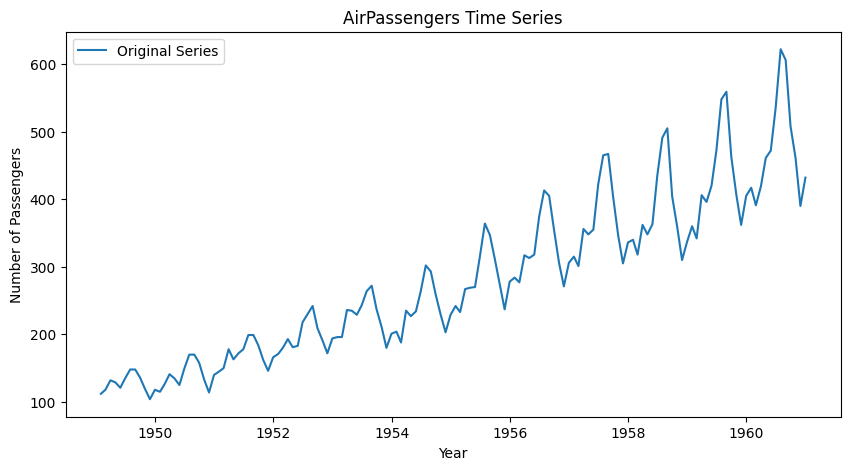

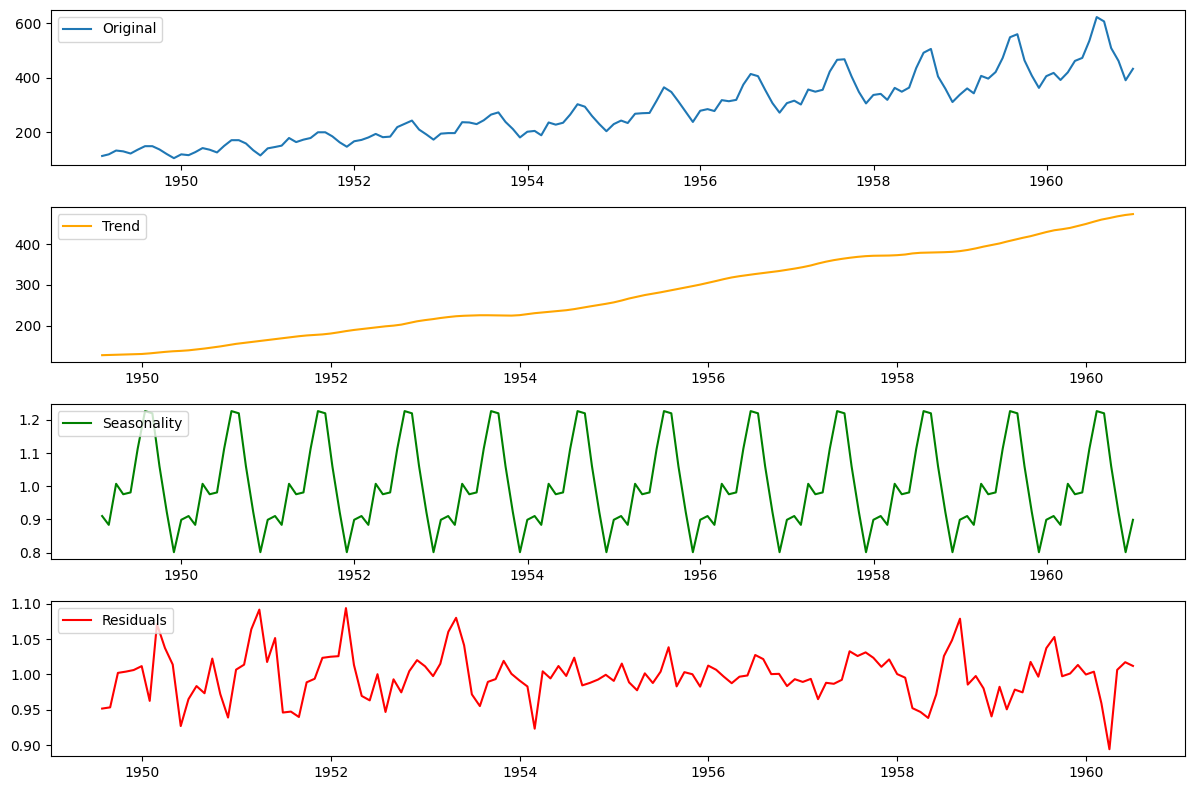

In [2]:
'''Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Step 1: Load AirPassengers dataset
data = get_rdataset("AirPassengers").data
ts = data['value']
ts.index = pd.date_range(start='1949-01', periods=len(ts), freq='M')

# Step 2: Plot original time series
plt.figure(figsize=(10,5))
plt.plot(ts, label='Original Series')
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Step 3: Decompose the series
decomposition = seasonal_decompose(ts, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Step 4: Plot decomposed components
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(ts, label='Original')
plt.legend(loc='upper left')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

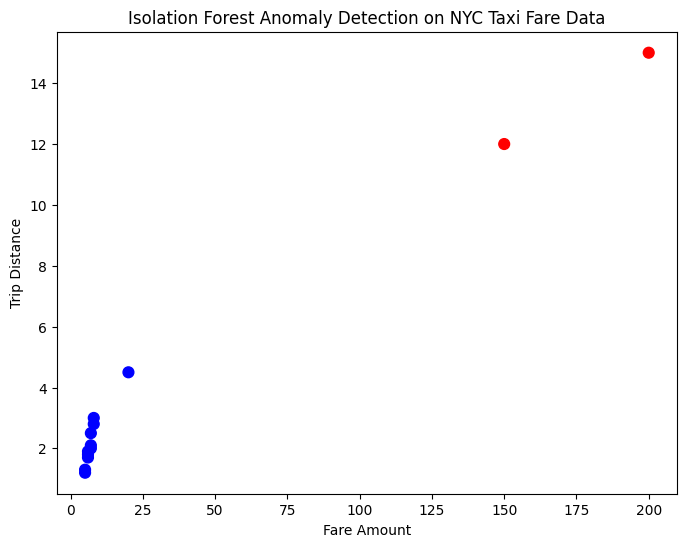

In [3]:
'''Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Load sample NYC Taxi Fare data
# For demonstration, let's create a synthetic subset of fare vs. trip distance
data = pd.DataFrame({
    'fare_amount': [5, 7, 6, 8, 20, 7, 6, 200, 5, 8, 7, 6, 150],
    'trip_distance': [1.2, 2.5, 1.8, 3.0, 4.5, 2.0, 1.7, 15.0, 1.3, 2.8, 2.1, 1.9, 12.0]
})

# Step 2: Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.15, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['fare_amount', 'trip_distance']])

# Step 3: Visualize anomalies
plt.figure(figsize=(8,6))
plt.scatter(data['fare_amount'], data['trip_distance'],
            c=data['anomaly'].map({1:'blue', -1:'red'}), s=60)
plt.title("Isolation Forest Anomaly Detection on NYC Taxi Fare Data")
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.show()

/tmp/ipython-input-2938398284.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.index = pd.date_range(start='1949-01', periods=len(ts), freq='M')
/tmp/ipython-input-2938398284.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='M')


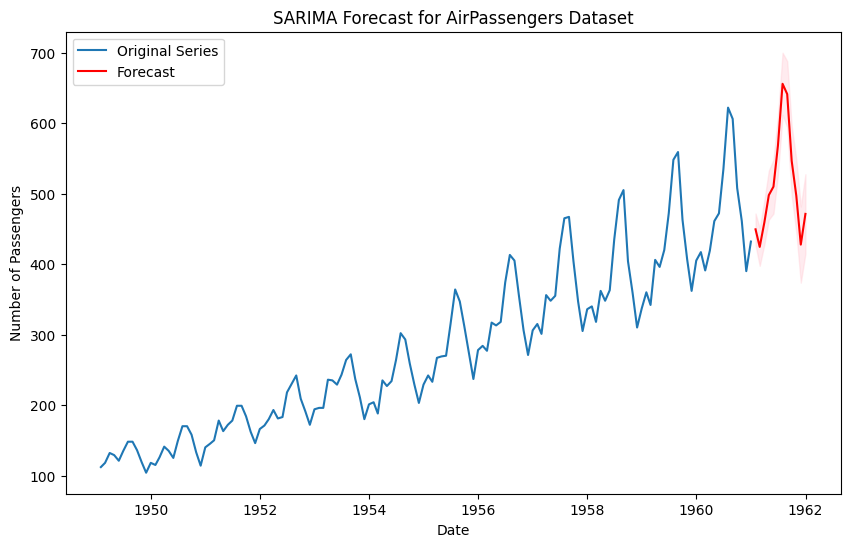

In [4]:
'''Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# Step 1: Load AirPassengers dataset
data = get_rdataset("AirPassengers").data
ts = data['value']
ts.index = pd.date_range(start='1949-01', periods=len(ts), freq='M')

# Step 2: Fit SARIMA model
# Parameters chosen as (p,d,q)=(1,1,1), seasonal (P,D,Q,s)=(1,1,1,12) as example
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = model.fit(disp=False)

# Step 3: Forecast next 12 months
forecast = sarima_result.get_forecast(steps=12)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=12, freq='M')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 4: Visualization
plt.figure(figsize=(10,6))
plt.plot(ts, label='Original Series')
plt.plot(forecast_index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast for AirPassengers Dataset")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

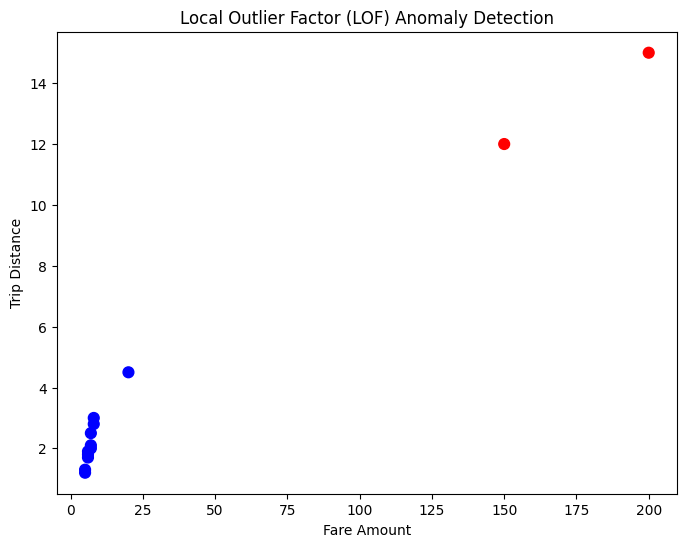

In [5]:
'''Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
(Include your Python code'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Step 1: Create a sample numerical dataset
data = pd.DataFrame({
    'fare_amount': [5, 7, 6, 8, 20, 7, 6, 200, 5, 8, 7, 6, 150],
    'trip_distance': [1.2, 2.5, 1.8, 3.0, 4.5, 2.0, 1.7, 15.0, 1.3, 2.8, 2.1, 1.9, 12.0]
})

# Step 2: Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.15)
data['anomaly'] = lof.fit_predict(data[['fare_amount', 'trip_distance']])

# Step 3: Visualize anomalies
plt.figure(figsize=(8,6))
plt.scatter(data['fare_amount'], data['trip_distance'],
            c=data['anomaly'].map({1:'blue', -1:'red'}), s=60)
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Fare Amount")
plt.ylabel("Trip Distance")
plt.show()

---
Question 10: Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?

---

Answer: **Real-Time Data Science Workflow for Energy Demand Forecasting and Anomaly Detection**

**A. Challenges:**
Energy consumption data is received continuously every 15 minutes. It is influenced by multiple factors such as weather, time of day, holidays, and special events. The goal is to detect unusual spikes or drops in real-time and provide accurate short-term forecasts to optimize grid operations.

**B. Anomaly Detection in Streaming Data:**
To detect anomalies in real-time, I would consider algorithms that are efficient for high-dimensional and sequential data:

**Isolation Forest:**

* Isolates anomalies by creating random splits in the feature space. Points that are isolated faster are flagged as anomalies.
* Suitable for high-dimensional data with multiple features like timestamp, region, weather, and energy usage.
* Advantages: fast, scalable, unsupervised.

**Local Outlier Factor (LOF):**

* Computes local density of each point relative to its neighbors. Points with lower density compared to neighbors are anomalies.
* Useful for detecting localized deviations in energy consumption patterns.

**DBSCAN:**

* Density-based clustering algorithm. Low-density points are marked as anomalies.
* Can handle spatial or temporal clusters, detecting anomalies across regions or time intervals.

For **real-time monitoring**, Isolation Forest is preferred because of its speed and ability to handle continuous data streams efficiently. A sliding window approach can be used to update the model incrementally as new data arrives.

**C. Time Series Forecasting:**
Energy consumption exhibits trends, seasonality (daily or weekly), and may be influenced by exogenous factors like weather.

**SARIMAX Model:**

* Extends SARIMA by including external variables (temperature, humidity, holidays).
* Captures seasonality, trends, and the impact of external factors.
* Ideal for short-term forecasting (next 15 minutes to 1 hour) in real-time energy monitoring.

**Implementation Steps:**

* Align and preprocess time series data, handle missing values.
* Fit SARIMAX on historical energy usage along with exogenous features.
* Use the most recent observations to forecast the next interval in real-time.

**D. Validation and Monitoring:**

* **Time-Series Cross-Validation:** Split data sequentially to preserve temporal order.
* **Metrics:** MAE, RMSE, MAPE for forecasting; precision, recall, F1-score for anomaly detection.
* **Real-Time Dashboards:** Visualize anomalies, forecast vs. actual values.
* **Performance Drift Monitoring:** Continuously evaluate and retrain models to adapt to changing patterns.

**E. Business Benefits:**

* **Operational Efficiency:** Detecting spikes or drops helps manage energy distribution, avoid blackouts, and optimize resource allocation.
* **Cost Reduction:** Accurate forecasts prevent overproduction or unnecessary energy purchases.
* **Strategic Insights:** Understanding usage patterns allows tailored pricing, demand shifting strategies, and maintenance planning.

**Python Code Example:**

```python
import pandas as pd
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Sample data: energy usage with exogenous feature (temperature)
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2025-01-01', periods=96, freq='15T'),
    'energy_usage': [50,52,51,49,60,55,54,200,53,52,51,50]*8,
    'temperature': [20,21,20,19,22,21,20,25,20,21,20,19]*8
})
data.set_index('timestamp', inplace=True)

# Anomaly Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['energy_usage','temperature']])

# Visualization of anomalies
plt.figure(figsize=(10,5))
plt.scatter(data.index, data['energy_usage'], c=data['anomaly'].map({1:'blue', -1:'red'}))
plt.xlabel("Time")
plt.ylabel("Energy Usage")
plt.title("Isolation Forest Anomaly Detection")
plt.show()

# Short-term Forecasting with SARIMAX
model = SARIMAX(data['energy_usage'], exog=data[['temperature']], order=(1,1,1), seasonal_order=(1,1,1,96))
sarima_result = model.fit(disp=False)

# Forecast next 12 periods (3 hours)
forecast = sarima_result.get_forecast(steps=12, exog=data[['temperature']].iloc[-12:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(data.index, data['energy_usage'], label='Observed')
plt.plot(pd.date_range(data.index[-1], periods=12, freq='15T')[1:], forecast_mean, color='red', label='Forecast')
plt.fill_between(pd.date_range(data.index[-1], periods=12, freq='15T')[1:],
                 forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("SARIMAX Forecast for Energy Usage")
plt.xlabel("Time")
plt.ylabel("Energy Usage")
plt.legend()
plt.show()
```

This workflow integrates **real-time anomaly detection** and **short-term forecasting** to support operational and strategic decisions for energy grid management.